In [18]:
# Imports
import os
import xarray as xr
from affine import Affine
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mticker
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

In [19]:
# Read the data
da = xr.open_rasterio('/Users/dgf3/Documents/ML_project/Stage1/Elevation.tif')
transform = Affine.from_gdal(*da.attrs['transform'])

# Define the projection
crs=ccrs.PlateCarree()

In [20]:
data=da.variable.data[0]
data = data.astype('float')

data[data == 32767] = np.nan
y=da.y
x=da.x
# Define extents
lat_min = min(da.y)
lat_max = max(da.y)
lon_min = min(da.x)
lon_max = max(da.x)

<xarray.DataArray 'y' (y: 1758)>
array([24.7     , 24.699722, 24.699444, ..., 24.2125  , 24.212222, 24.211944])
Coordinates:
  * y        (y) float64 24.7 24.7 24.7 24.7 24.7 ... 24.21 24.21 24.21 24.21

/var/folders/pc/k8nnznkn185_mr5nqxcxrb6w0000gp/T/ipykernel_80451/4013990527.py:17: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  fig.colorbar(im, extend="both")


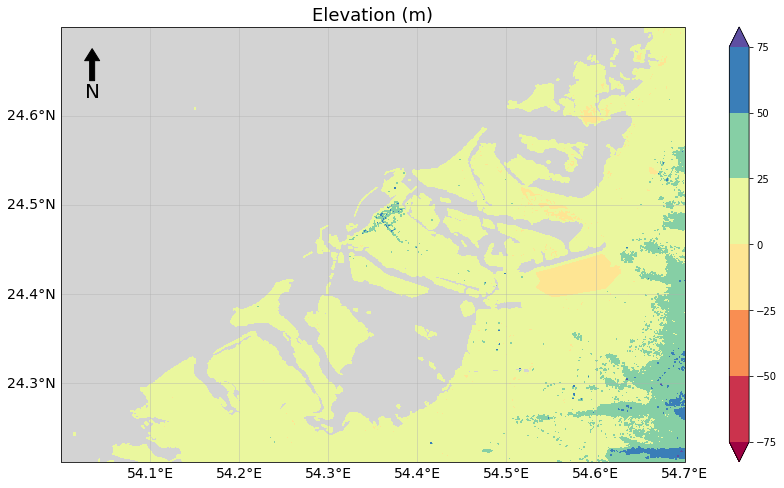

In [24]:
# Plot!
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection=crs)
im =ax.contourf(x, y, data, cmap='Spectral', extend='both',linestyles="solid")
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
ax.set_facecolor('#d3d3d3')
fontprops = fm.FontProperties(size=18)

# Grid and Labels
gl = ax.gridlines(crs=crs, draw_labels=True, alpha=0.5)
gl.top_labels = None
gl.right_labels = None
xgrid = np.arange(lon_min-0.5, lon_max+.5, 1.)
ygrid = np.arange(lat_min, lat_max+1, 1.)
gl.xlabel_style = {'size': 14, 'color': 'black'}
gl.ylabel_style = {'size': 14, 'color': 'black'}
fig.colorbar(im, extend="both")

#Add North arrow
x1, y1, arrow_length = 0.05, 0.95, 0.1
ax.annotate('N', xy=(x1, y1), xytext=(x1, y1-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
# Add title and axis names
plt.title('Elevation (m)', fontproperties=fontprops)


# scalebar = AnchoredSizeBar(ax.transData,
#                            20, '20 m', 'lower center', 
#                            pad=0.1,
#                            color='white',
#                            frameon=False,
#                            size_vertical=1,
#                            fontproperties=fontprops)

# ax.add_artist(scalebar)
#scalebar = ScaleBar(1, "m", length_fraction=0.25,box_color=None,box_alpha=0, location='lower left')
#ax.add_artist(scalebar)
plt.show()